In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iowa_liquor_sales = pd.read_csv('./iowa_liquor_clean.csv')

In [3]:
iowa_liquor_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564565 entries, 0 to 2564564
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   invoice/item_number    object 
 1   date                   object 
 2   store_name             object 
 3   city                   object 
 4   county                 object 
 5   category_name          object 
 6   vendor_name            object 
 7   item_description       object 
 8   bottle_volume_(ml)     int64  
 9   state_bottle_cost      float64
 10  state_bottle_retail    float64
 11  bottles_sold           int64  
 12  sale_(dollars)         float64
 13  volume_sold_(liters)   float64
 14  volume_sold_(gallons)  float64
 15  month                  int64  
 16  month_name             object 
dtypes: float64(5), int64(3), object(9)
memory usage: 332.6+ MB


In [4]:
iowa_liquor_sales.head()

,invoice/item_number,date,store_name,city,county,category_name,vendor_name,item_description,bottle_volume_(ml),state_bottle_cost,state_bottle_retail,bottles_sold,sale_(dollars),volume_sold_(liters),volume_sold_(gallons),month,month_name
0,INV-43468400010,2022-01-02,HY-VEE / PLEASANT HILL,PLEASANT HILL,POLK,TEMPORARY & SPECIALTY PACKAGES,CEDAR RIDGE VINEYARDS LL,CEDAR RIDGE SIR MAPLE,750,23.00,34.50,6,207.00,4.5,1.18,1,January
1,INV-43468500035,2022-01-02,"CENTRAL CITY LIQUOR, INC.",DES MOINES,POLK,GOLD RUM,BACARDI USA INC,BACARDI GOLD MINI,50,5.54,8.31,2,16.62,0.1,0.02,1,January
2,INV-43468500011,2022-01-02,"CENTRAL CITY LIQUOR, INC.",DES MOINES,POLK,SINGLE MALT SCOTCH,MOET HENNESSY USA,ARDBEG WEE BEASTIE,750,23.99,35.99,6,215.94,4.5,1.18,1,January
3,INV-43468500020,2022-01-02,"CENTRAL CITY LIQUOR, INC.",DES MOINES,POLK,IMPORTED FLAVORED VODKA,CONSTELLATION BRANDS INC,SVEDKA BLUE RASPBERRY,750,8.00,12.00,2,24.00,1.5,0.39,1,January
4,INV-43468500039,2022-01-02,"CENTRAL CITY LIQUOR, INC.",DES MOINES,POLK,IMPORTED DISTILLED SPIRIT SPECIALTY,CONSTELLATION BRANDS INC,MI CAMPO REPOSADO,750,12.40,18.60,2,37.20,1.5,0.39,1,January


In [5]:

iowa_liquor_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564565 entries, 0 to 2564564
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   invoice/item_number    object 
 1   date                   object 
 2   store_name             object 
 3   city                   object 
 4   county                 object 
 5   category_name          object 
 6   vendor_name            object 
 7   item_description       object 
 8   bottle_volume_(ml)     int64  
 9   state_bottle_cost      float64
 10  state_bottle_retail    float64
 11  bottles_sold           int64  
 12  sale_(dollars)         float64
 13  volume_sold_(liters)   float64
 14  volume_sold_(gallons)  float64
 15  month                  int64  
 16  month_name             object 
dtypes: float64(5), int64(3), object(9)
memory usage: 332.6+ MB



# Insights and Visualization

In [6]:
import calendar

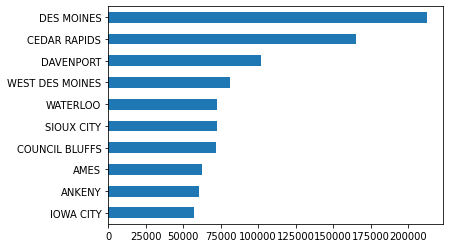

In [7]:
iowa_liquor_sales.city.value_counts()[:10].plot(kind='barh').invert_yaxis()

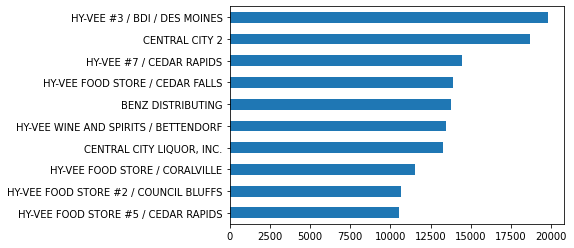

In [8]:
iowa_liquor_sales.store_name.value_counts()[:10].plot(kind='barh').invert_yaxis()

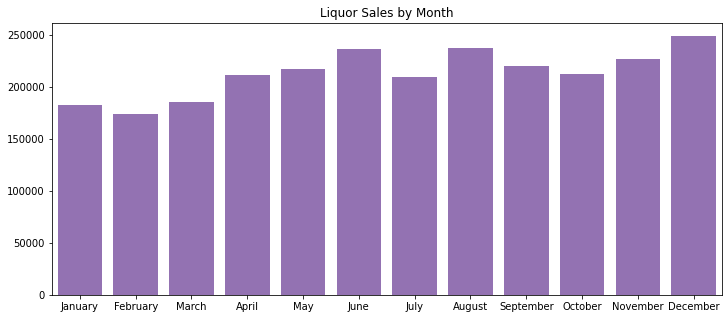

In [9]:
color = sns.color_palette()[4]

plt.figure(figsize=(12,5))
sns.countplot(data=iowa_liquor_sales, x='month_name',color=color)
plt.title('Liquor Sales by Month')
plt.ylabel('')
plt.xlabel('')
plt.show()

In [10]:
top_buyers = pd.DataFrame(iowa_liquor_sales.groupby('county')['sale_(dollars)'].sum()).sort_values(by='sale_(dollars)', ascending=False).head()

In [11]:
top_buyers = top_buyers.reset_index()

In [12]:
top_buyers

,county,sale_(dollars)
0,POLK,1.006306e+08
1,LINN,3.603944e+07
2,SCOTT,2.728397e+07
3,JOHNSON,2.475249e+07
4,BLACK HAWK,2.248416e+07


<BarContainer object of 5 artists>

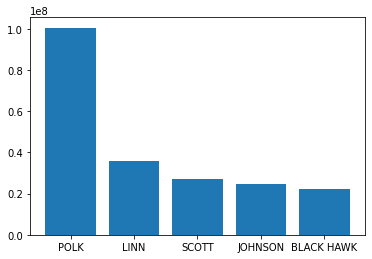

In [13]:
plt.bar(data=top_buyers, x='county', height='sale_(dollars)')

In [14]:
top_demand_by_county = pd.DataFrame(iowa_liquor_sales.groupby('county')['bottles_sold'].sum()).sort_values(by='bottles_sold', ascending=False).head()

In [15]:
top_demand_by_county = top_demand_by_county.reset_index()

In [16]:
top_demand_by_county

,county,bottles_sold
0,POLK,7022989
1,LINN,2695443
2,SCOTT,2134820
3,BLACK HAWK,1728897
4,JOHNSON,1573336


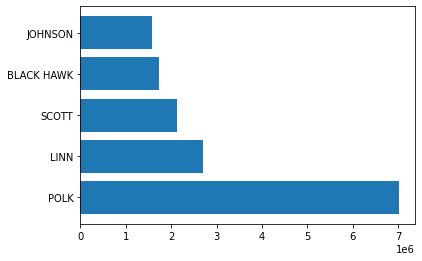

In [17]:
plt.barh(y='county', height=0.8, width='bottles_sold', data=top_demand_by_county)
plt.show()